In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# 1. Loading the data

In [2]:
# reading the csv as data frames
movies = pd.read_csv('data/movies_metadata.csv')
credits = pd.read_csv('data/credits.csv')

/Users/hugo/opt/anaconda3/envs/ada/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# set movie id as index
movies.set_index('id', inplace=True)

# 2. Genres

In [4]:
# extract all genres
genre_in_movie = []
for _, row in movies.iterrows():
    for g in ast.literal_eval(row.genres):
        genre_in_movie.append([g["name"], g["id"]])

In [5]:
# convert genre movie to dataframe
genre_in_movie = pd.DataFrame(genre_in_movie)
genre_in_movie.columns = ["genre", "movie_id"]

In [6]:
# group genres and count number of movies + sort
sorted_genres = genre_in_movie.groupby('genre').count().rename(columns={"movie_id": "movie_count"}).sort_values(by="movie_count", ascending=False)

In [7]:
# only keep relevant genres
sorted_genres = sorted_genres[sorted_genres.values > 1]

In [8]:
# display genres by usage
sorted_genres

,movie_count
genre,
Drama,20265
Comedy,13182
Thriller,7624
Romance,6735
Action,6596
Horror,4673
Crime,4307
Documentary,3932
Adventure,3496


# 3. Actors and movies

In [9]:
# extract all actors
cast_in_movie = []
for _, r in credits.cast.iteritems():
    for g in ast.literal_eval(r):
        cast_in_movie.append([g["name"], g["id"]])

In [10]:
# convert actor movie to dataframe
cast_in_movie = pd.DataFrame(cast_in_movie)
cast_in_movie.columns = ["actor", "movie_id"]

In [11]:
# group actors and count number of movies + sort
sorted_actors = cast_in_movie.groupby('actor').count().rename(columns={"movie_id": "movie_count"}).sort_values(by="movie_count", ascending=False)

In [12]:
# display number of actors
sorted_actors.shape

(202747, 1)

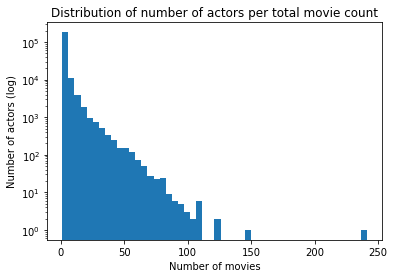

In [13]:
# display histogram of actors with number of movies
plt.hist(sorted_actors, bins=50, log=True)
plt.xlabel("Number of movies")
plt.ylabel("Number of actors (log)")
plt.title("Distribution of number of actors per total movie count")
plt.show()

In [14]:
# keep only actors that were in 20 or more movies
top_actors = sorted_actors[sorted_actors.movie_count >= 20]

In [15]:
# display number of top actors
top_actors.shape

(3776, 1)

In [16]:
# display top actors
top_actors

,movie_count
actor,
Bess Flowers,241
Christopher Lee,148
John Wayne,125
Samuel L. Jackson,123
Gérard Depardieu,110
...,...
Tony Roberts,20
Vic Tayback,20
Andrew Duggan,20


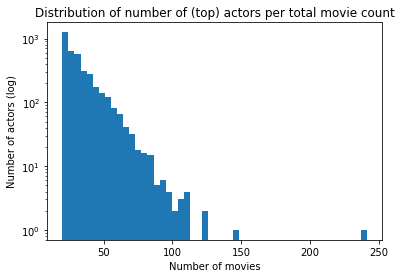

In [17]:
# display histogram of top actors with number of movies
plt.hist(top_actors, bins=50, log=True)
plt.xlabel("Number of movies")
plt.ylabel("Number of actors (log)")
plt.title("Distribution of number of (top) actors per total movie count")
plt.show()

In [18]:
# number of movies 
movies.shape

(45466, 23)

In [19]:
# get ids of the movies of the top actors
top_actors_movies_ids = pd.Series(cast_in_movie[cast_in_movie.actor.isin(top_actors.index)].movie_id.unique()).map(str)

In [20]:
# get the movie metadata for those
top_actors_movies = movies.loc[top_actors_movies_ids[top_actors_movies_ids.isin(movies.index)]]
# display filtered number of movies
top_actors_movies.shape

(1399, 23)

In [21]:
top_actors_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,
12900,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,tt0266425,en,Conspiracy,The historical recreation of the 1942 Wannsee ...,4.633229,...,2001-05-19,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One meeting. Six million lives.,Conspiracy,False,6.9,77.0
12133,False,NaN,65000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0838283,en,Step Brothers,Brennan Huff and Dale Doback might be grown me...,8.579638,...,2008-07-25,128107642.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,They grow up so fast.,Step Brothers,False,6.5,1084.0
2157,False,NaN,80000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",NaN,tt0120738,en,Lost in Space,The prospects for continuing life on Earth in ...,12.000579,...,1998-04-03,136159423.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Danger, Will Robinson!",Lost in Space,False,5.0,395.0
205,False,NaN,17500000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.metrofilms.com/hotelrwanda/,tt0395169,en,Hotel Rwanda,"Inspired by true events, this film takes place...",10.262332,...,2004-09-11,38000000.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"When the world closed its eyes, he opened his ...",Hotel Rwanda,False,7.5,805.0
10739,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0313792,en,Anything Else,"Jerry Falk, an aspiring writer in New York, fa...",11.10416,...,2003-08-27,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In any relationship one person always does the...,Anything Else,False,6.2,151.0


# 4. Movie revenues and ratings

In [22]:
# all movies average revenue
movies.revenue.mean()

11209348.539265288

In [23]:
# selected movies average revenue
top_actors_movies.revenue.mean()

31749677.249463905

In [24]:
# all movies average rating
movies.vote_average.mean()

5.618207215133889

In [25]:
# selected movies average rating
top_actors_movies.vote_average.mean()

6.176769120800578